In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


train_path = 'D:/CowLumpyDiseases/Dataset/TrainData/'
valid_path = 'D:/CowLumpyDiseases/Dataset/TestData/'

# add preprocessing layer to the front of VGG
mbnt = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [3]:

import os
imageCount=0
row=1
for path, currentDirectory, files in os.walk('D:/CowLumpyDiseases/Dataset/TestData/'):
    for file in files:
        print(os.path.join(path, file))
        imageCount=imageCount + 1

      

D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs272.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs274.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs275.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs276.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs277.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs280.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs282.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs283.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs284.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs285.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs286.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs287.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs288.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs289.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs290.jpg
D:/CowLumpyDiseases/Dataset/TestData/healthycows\imgs291.jpg
D:/CowLumpyDiseases/Data

In [4]:
imageCount

230

In [5]:
# don't train existing weights
for layer in mbnt.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of classes

folders = glob('D:/CowLumpyDiseases/Dataset/TrainData/*')
print(len(folders))

2


In [7]:
# our layers - you can add more if you want
x = Flatten()(mbnt.output)
x = Dense(50, activation='relu')(x)
x = Dense(40, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
#prediction = Dense(1, activation='sigmoid')(x)


In [8]:
# create a model object
model = Model(inputs=mbnt.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [10]:
from tensorflow.keras import optimizers

model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.9),
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
      

training_set = train_datagen.flow_from_directory('D:/CowLumpyDiseases/Dataset/TrainData/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:/CowLumpyDiseases/Dataset/TestData/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 563 images belonging to 2 classes.
Found 230 images belonging to 2 classes.


In [12]:
import os
cats=[]
cat=[]

for path, currentDirectory, files in os.walk("D:/CowLumpyDiseases/Dataset/TrainData/"):
    for file in files:
        #print(os.path.join(path, file))
        #print(file)
        cats=path.split("\\")
        cats=cats[len(cats)-1]
        if cats not in cat:
            cat.append(cats)
            print(cats)
cat.sort()
print(cat)

#images,cls = next(test_set)



D:/CowLumpyDiseases/Dataset/TrainData/healthycows
D:/CowLumpyDiseases/Dataset/TrainData/lumpycows
['D:/CowLumpyDiseases/Dataset/TrainData/healthycows', 'D:/CowLumpyDiseases/Dataset/TrainData/lumpycows']


In [13]:
#images,cls = next(test_set)
#plt.imshow(images[3])
#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()

In [14]:
print(len(test_set))
print(len(training_set))

8
18


In [15]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
18/18 [==============================] - 40s 2s/step - loss: 6.3543 - accuracy: 0.5933 - val_loss: 0.4621 - val_accuracy: 0.8435
Epoch 2/5
18/18 [==============================] - 29s 2s/step - loss: 1.1046 - accuracy: 0.7442 - val_loss: 0.1766 - val_accuracy: 0.9174
Epoch 3/5
18/18 [==============================] - 29s 2s/step - loss: 0.8776 - accuracy: 0.7975 - val_loss: 0.3485 - val_accuracy: 0.8565
Epoch 4/5
18/18 [==============================] - 34s 2s/step - loss: 0.9327 - accuracy: 0.7851 - val_loss: 0.2385 - val_accuracy: 0.9130
Epoch 5/5
18/18 [==============================] - 31s 2s/step - loss: 0.4644 - accuracy: 0.8739 - val_loss: 0.1365 - val_accuracy: 0.9522


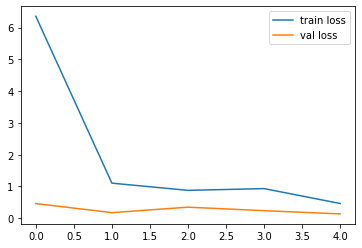

In [16]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

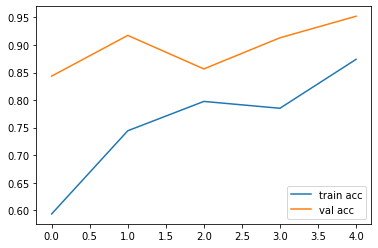

In [17]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [18]:
a, acc = model.evaluate(test_set)
print(acc)
print(a)

8/8 [==============================] - 9s 1s/step - loss: 0.1365 - accuracy: 0.9522
0.9521738886833191
0.13648220896720886


In [79]:
#model.save("D:/CatractImagesMobileNet/cataract/Mobile114Model.h4")

In [19]:
test_set = test_datagen.flow_from_directory("D:/CowLumpyDiseases/Dataset/TestData/",
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)

Found 230 images belonging to 2 classes.
[[2.27579270e-02 9.77242112e-01]
 [9.96913552e-01 3.08645680e-03]
 [6.67165978e-07 9.99999285e-01]
 [1.58320200e-02 9.84167993e-01]
 [9.78775918e-01 2.12241132e-02]
 [1.67503567e-05 9.99983191e-01]
 [8.99760842e-01 1.00239113e-01]
 [3.03108688e-03 9.96968925e-01]
 [9.95518446e-01 4.48155263e-03]
 [4.79321500e-07 9.99999523e-01]
 [1.50604104e-03 9.98493910e-01]
 [9.49658977e-04 9.99050319e-01]
 [9.99995232e-01 4.74591889e-06]
 [1.98143139e-03 9.98018622e-01]
 [9.11115333e-02 9.08888459e-01]
 [2.48170295e-03 9.97518301e-01]
 [9.99701321e-01 2.98633589e-04]
 [6.82152109e-04 9.99317884e-01]
 [1.16374251e-02 9.88362610e-01]
 [9.99996901e-01 3.08281915e-06]
 [9.99863267e-01 1.36667179e-04]
 [9.96228456e-01 3.77156655e-03]
 [9.74051535e-01 2.59484109e-02]
 [3.81525129e-01 6.18474901e-01]
 [4.80145682e-04 9.99519825e-01]
 [1.39448466e-03 9.98605549e-01]
 [9.98563707e-01 1.43628684e-03]
 [9.99446213e-01 5.53735706e-04]
 [6.01203859e-01 3.98796111e-01]
 [

In [20]:
import xlsxwriter
workbook = xlsxwriter.Workbook('D:/CowLumpyDiseases/output/MobileImagesAnalysis-1.xlsx')

worksheet1 = workbook.add_worksheet()
row=0
col=0
imageCount=0
worksheet1.write(row, 0, str("ImageName"))
worksheet1.write(row, 1, str("Actual Class Code"))
worksheet1.write(row, 2, str("Actual Class Name"))
worksheet1.write(row, 3, str("Predicted Result"))
worksheet1.write(row, 4, str("Class Code Based on Predicted Result"))
worksheet1.write(row, 5, str("Predicted Class Name"))
worksheet1.write(row, 6, str("CF-Measure"))

# importing the modules
import os
import shutil
# Providing the folder path

    
    
origin =  "D:\\CowLumpyDiseases\\Dataset\\TestData\\healthycows\\"
target1 = 'D:\\CowLumpyDiseases\\TestCheck\\healthycows\\'

# Fetching the list of all the files
files = os.listdir(origin)
actual=[]
predicted=[]
ac=[]
pr=[]
# Fetching all the files to directory
row=1
for file_name in files:
    shutil.copy(origin+file_name, target1+file_name)
    print("Original" + str(origin+file_name))
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('D:\\CowLumpyDiseases\\TestCheck\\',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
    images,cls = next(test_set)
    filme=test_set.filenames
    #plt.imshow(images[0])
    worksheet1.write(row, 0, str(filme[0]))
    worksheet1.write(row, 1, str(cls[0]))
    worksheet1.write(row, 2, str("healthycows"))
    print("Actual")
    print(cls[0])
    print(cls[0][0])
    print(cls[0][1])
    actual.append(cls[0])
    ac.append("healthycows")
    print(filme[0])
    pred = model.predict(test_set)
    worksheet1.write(row, 3, str(pred))
    print("Predicted")
    print(pred)
    print(pred[0][0])
    print(pred[0][1])
    if(pred[0][0]>pred[0][1]):
        predicted.append([1.0,0.0])
        worksheet1.write(row, 4, str("[1.0,0.0]"))
        worksheet1.write(row, 5, str("healthycows"))
        worksheet1.write(row, 6, str("True healthycows"))
        pr.append("healthycows")
        print("healthycows")
    else:
        predicted.append([0.0,1.0])
        worksheet1.write(row, 4, str("[0.0,1.0]"))
        worksheet1.write(row, 5, str("lumpycows"))
        worksheet1.write(row, 6, str("False lumpycows"))
        pr.append("lumpycows")
        print("lumpycows")
    print("======================")
    path = r"D:\\CowLumpyDiseases\\TestCheck\\healthycows\\"
    for fileN in os.listdir(path):
        # construct full file path
        fi = path + fileN
        if os.path.isfile(fi):
            print('Deleting file:', fi)
            os.remove(fi)
    row=row+1
print("Files are copied successfully")


OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs272.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs272.jpg
Predicted
[[0.85282373 0.14717622]]
0.85282373
0.14717622
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs272.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs274.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs274.jpg
Predicted
[[0.9799417  0.02005831]]
0.9799417
0.020058308
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs274.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs275.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs275.jpg
Predicted
[[9.9998450e-01 1.5498072e-05]]
0.9999845
1.5498072e-05
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs275.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs276.jpg
Found 1 images belonging to 2

Predicted
[[0.9988432  0.00115676]]
0.9988432
0.001156761
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs308.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs309.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs309.jpg
Predicted
[[0.99031025 0.00968979]]
0.99031025
0.009689795
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs309.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs312.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs312.jpg
Predicted
[[0.997969   0.00203106]]
0.997969
0.0020310578
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs312.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs313.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs313.jpg
Predicted
[[0.965019   0.03498103]]
0.965019
0.03498103
healthycows
Deleting file: D:\\CowLumpyDiseases\\

Predicted
[[0.8876973 0.1123027]]
0.8876973
0.1123027
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs351.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs354.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs354.jpg
Predicted
[[9.9993956e-01 6.0440605e-05]]
0.99993956
6.0440605e-05
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs354.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs355.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs355.jpg
Predicted
[[9.9999774e-01 2.3032155e-06]]
0.99999774
2.3032155e-06
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs355.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs356.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs356.jpg
Predicted
[[0.96859187 0.03140808]]
0.96859187
0.03140808
healthycows
Deleting file: D:\\Cow

Predicted
[[9.995608e-01 4.392515e-04]]
0.9995608
0.0004392515
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs391.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs392.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs392.jpg
Predicted
[[9.9977416e-01 2.2590821e-04]]
0.99977416
0.00022590821
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs392.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs393.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs393.jpg
Predicted
[[9.9982423e-01 1.7580557e-04]]
0.9998242
0.00017580557
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs393.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs395.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs395.jpg
Predicted
[[0.84079355 0.1592065 ]]
0.84079355
0.1592065
healthycows
Deleting file: 

Predicted
[[9.994462e-01 5.537291e-04]]
0.9994462
0.0005537291
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs426.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs428.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs428.jpg
Predicted
[[9.9970132e-01 2.9863103e-04]]
0.9997013
0.00029863103
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs428.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs432.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs432.jpg
Predicted
[[9.9999690e-01 3.0828369e-06]]
0.9999969
3.0828369e-06
healthycows
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\healthycows\\imgs432.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\healthycows\imgs433.jpg
Found 1 images belonging to 2 classes.
Actual
[1. 0.]
1.0
0.0
healthycows\imgs433.jpg
Predicted
[[0.99604577 0.00395427]]
0.99604577
0.003954267
healthycows
Deleting file:

In [21]:
import os
import shutil
# Providing the folder path

origin =  "D:\\CowLumpyDiseases\\Dataset\\TestData\\lumpycows\\"
target1 = 'D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\'
# Fetching the list of all the files
files = os.listdir(origin)

# Fetching all the files to directory
for file_name in files:
    shutil.copy(origin+file_name, target1+file_name)
    print("Original" + str(origin+file_name))
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('D:\\CowLumpyDiseases\\TestCheck\\',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
    images,cls = next(test_set)
    filme=test_set.filenames
    
    #plt.imshow(images[0])
    worksheet1.write(row, 0, str(filme[0]))
    worksheet1.write(row, 1, str(cls[0]))
    worksheet1.write(row, 2, str("lumpycows"))
    print("Actual")
    print(cls[0])
    print(cls[0][0])
    print(cls[0][1])
    actual.append(cls[0])
    ac.append("lumpycows")
    print(filme[0])
    pred = model.predict(test_set)
    worksheet1.write(row, 3, str(pred))
    print("Predicted")
    print(pred)
    print(pred[0][0])
    print(pred[0][1])
    if(pred[0][0]>pred[0][1]):
        predicted.append([1.0,0.0])
        worksheet1.write(row, 4, str("[1.0,0.0]"))
        worksheet1.write(row, 5, str("healthycows"))
        worksheet1.write(row, 6, str("False healthycows"))
        pr.append("healthycows")
    else:
        predicted.append([0.0,1.0])
        worksheet1.write(row, 4, str("[0.0,1.0]"))
        worksheet1.write(row, 5, str("lumpycows"))
        worksheet1.write(row, 6, str("True lumpycows"))
        pr.append("lumpycows")
    path = r"D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\"
    for fileN in os.listdir(path):
        # construct full file path
        fi = path + fileN
        if os.path.isfile(fi):
            print('Deleting file:', fi)
            os.remove(fi)
    row=row+1
print("Files are copied successfully")
workbook.close()

OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1030.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1030.jpg
Predicted
[[0.13981827 0.8601817 ]]
0.13981827
0.8601817
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1030.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1031.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1031.jpg
Predicted
[[1.6750166e-05 9.9998319e-01]]
1.6750166e-05
0.9999832
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1031.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1032.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1032.jpg
Predicted
[[7.1092468e-04 9.9928904e-01]]
0.0007109247
0.99928904
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1032.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1033.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img103

Predicted
[[0.29494494 0.70505506]]
0.29494494
0.70505506
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1059.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1060.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1060.jpg
Predicted
[[0.00122726 0.9987727 ]]
0.0012272648
0.9987727
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1060.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1061.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1061.jpg
Predicted
[[0.00139287 0.9986071 ]]
0.0013928727
0.9986071
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1061.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1062.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1062.jpg
Predicted
[[0.00208794 0.997912  ]]
0.0020879412
0.997912
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1062.jpg
OriginalD:\CowLumpyDiseases\D

Predicted
[[0.9404481  0.05955188]]
0.9404481
0.059551883
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1089.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1090.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1090.jpg
Predicted
[[0.00144025 0.9985598 ]]
0.0014402522
0.9985598
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1090.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1091.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1091.jpg
Predicted
[[0.3910875 0.6089125]]
0.3910875
0.6089125
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1091.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1092.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1092.jpg
Predicted
[[0.0904925 0.9095075]]
0.0904925
0.9095075
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1092.jpg
OriginalD:\CowLumpyDiseases\Dataset\Te

Predicted
[[6.8214757e-04 9.9931788e-01]]
0.00068214757
0.9993179
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1119.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1120.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1120.jpg
Predicted
[[0.94580656 0.05419348]]
0.94580656
0.054193478
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1120.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1121.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1121.jpg
Predicted
[[0.9037341  0.09626591]]
0.9037341
0.09626591
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1121.jpg
OriginalD:\CowLumpyDiseases\Dataset\TestData\lumpycows\img1122.jpg
Found 1 images belonging to 2 classes.
Actual
[0. 1.]
0.0
1.0
lumpycows\img1122.jpg
Predicted
[[0.04460379 0.95539623]]
0.044603795
0.95539623
Deleting file: D:\\CowLumpyDiseases\\TestCheck\\lumpycows\\img1122.jpg
OriginalD:\CowLumpyDis

In [22]:
ac

['healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'health

In [23]:
pr

['healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'lumpycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'healthycows',
 'lumpycows',
 'healthycows',
 'healthycows',
 'healthycow

In [24]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       130
           1       0.96      0.93      0.94       100

   micro avg       0.95      0.95      0.95       230
   macro avg       0.95      0.95      0.95       230
weighted avg       0.95      0.95      0.95       230
 samples avg       0.95      0.95      0.95       230



In [25]:
predicted

[[1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],

In [26]:
from sklearn.metrics import classification_report
print(classification_report(ac,pr))


              precision    recall  f1-score   support

 healthycows       0.95      0.97      0.96       130
   lumpycows       0.96      0.93      0.94       100

    accuracy                           0.95       230
   macro avg       0.95      0.95      0.95       230
weighted avg       0.95      0.95      0.95       230



In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ac, pr)
cm

array([[126,   4],
       [  7,  93]], dtype=int64)

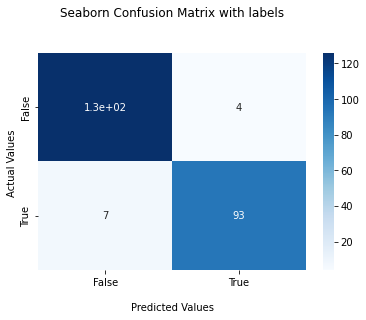

In [28]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()





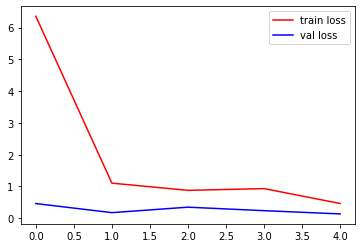

In [29]:
# loss
plt.figure(figsize=(6,4))
plt.plot(r.history['loss'], label='train loss', color="red")
plt.plot(r.history['val_loss'], label='val loss', color="blue")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

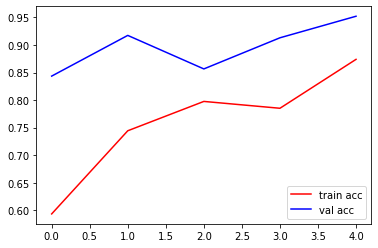

In [30]:
# accuracies
plt.figure(figsize=(6,4))
plt.plot(r.history['accuracy'], label='train acc', color="red")
plt.plot(r.history['val_accuracy'], label='val acc', color="blue")
plt.legend()
#plt.bar(r.history['accuracy'],height = 1.0)

plt.show()
#plt.savefig('AccVal_acc')



In [39]:
test_set = test_datagen.flow_from_directory('D:\\CowLumpyDiseases\\TestCheck\\',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)



Found 1 images belonging to 2 classes.
[[0.01599001 0.9840099 ]]


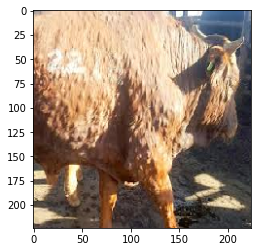

In [40]:
images,cls = next(test_set)
plt.imshow(images[0])